<a href="https://www.kaggle.com/code/mesutssmn/smoker-prediction-with-ml-models?scriptVersionId=158752489" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)

# About Dataset;

* **smoker**	: Is the individual a current smoker? yes or no

* **ban**	: Is there a work area smoking ban? yes or no

* **age**	: Age in years.(integer)

* **education**	: Highest education level attained: high school (hs) drop out, high school graduate, some college, college graduate, master's degree (or higher).(string)

* **afam**	: Is the individual African-American? true or false

* **hispanic**	: Is the individual Hispanic? true or false

* **gender**	: male or female

In [2]:
df = pd.read_csv('/kaggle/input/do-workplace-smoking-bans-reduce-smoking/SmokeBan.csv')

In [3]:
df["Caucasian"] = "no" 

In [4]:
df.head()

,Unnamed: 0,smoker,ban,age,education,afam,hispanic,gender,Caucasian
0,1,yes,yes,41,hs,no,no,female,no
1,2,yes,yes,44,some college,no,no,female,no
2,3,no,no,19,some college,no,no,female,no
3,4,yes,no,29,hs,no,no,female,no
4,5,no,yes,28,some college,no,no,female,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10000 non-null  int64 
 1   smoker      10000 non-null  object
 2   ban         10000 non-null  object
 3   age         10000 non-null  int64 
 4   education   10000 non-null  object
 5   afam        10000 non-null  object
 6   hispanic    10000 non-null  object
 7   gender      10000 non-null  object
 8   Caucasian   10000 non-null  object
dtypes: int64(2), object(7)
memory usage: 703.2+ KB


In [6]:
df.isna().sum()

Unnamed: 0    0
smoker        0
ban           0
age           0
education     0
afam          0
hispanic      0
gender        0
Caucasian     0
dtype: int64

In [7]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [8]:
df.loc[(df["afam"] == "no") & (df["hispanic"] == "no"), "Caucasian"] = "yes"

In [9]:
df = df.rename(columns={'smoker':'Smoker','ban':'Ban','age':'Age','education':'Education','afam':'Afro-American','hispanic':'Hispanic','gender':'Gender'})

In [10]:
df.head()

,Smoker,Ban,Age,Education,Afro-American,Hispanic,Gender,Caucasian
0,yes,yes,41,hs,no,no,female,yes
1,yes,yes,44,some college,no,no,female,yes
2,no,no,19,some college,no,no,female,yes
3,yes,no,29,hs,no,no,female,yes
4,no,yes,28,some college,no,no,female,yes


In [11]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))

    if plot:
        plt.figure(figsize=(8,6))
        sns.boxplot(x=dataframe[col_name], y=df["Age"],hue = df['Gender'],palette='tab10')
        plt.xticks(rotation=80)
        plt.show()

     Smoker  Ratio
no     7577  75.77
yes    2423  24.23


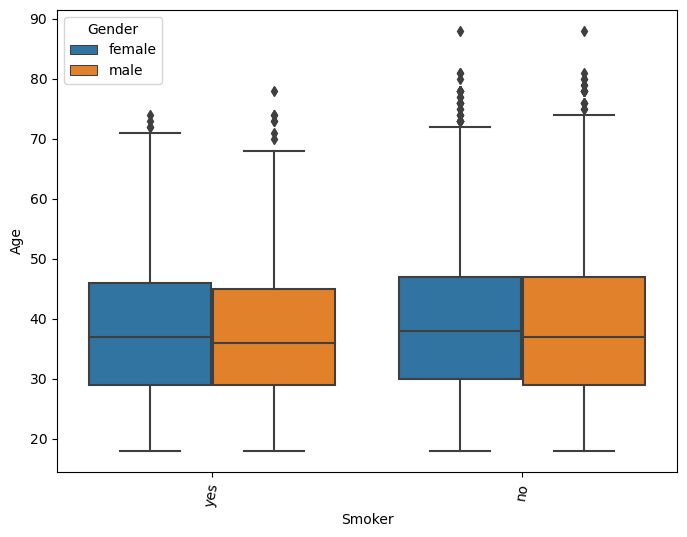

      Ban  Ratio
yes  6098  60.98
no   3902  39.02


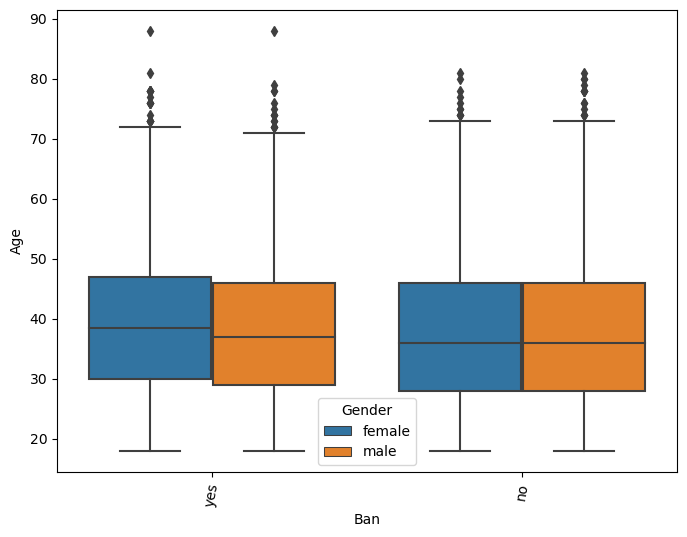

              Education  Ratio
hs                 3266  32.66
some college       2802  28.02
college            1972  19.72
master             1048  10.48
hs drop out         912   9.12


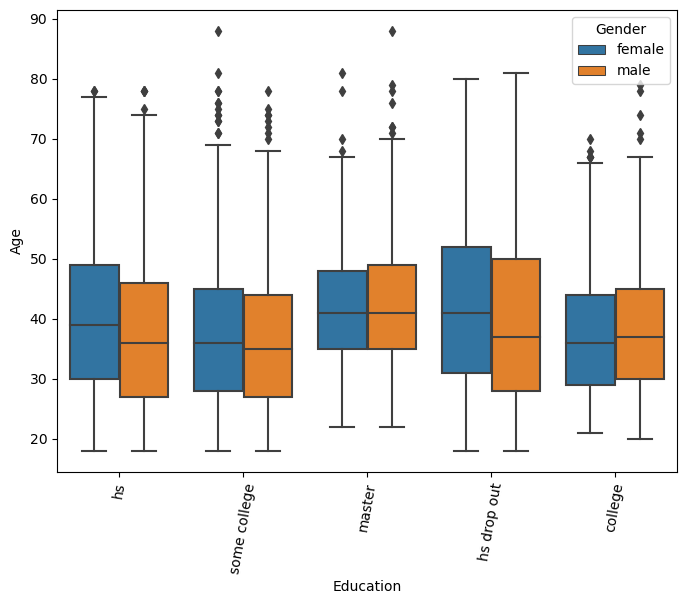

     Afro-American  Ratio
no            9231  92.31
yes            769   7.69


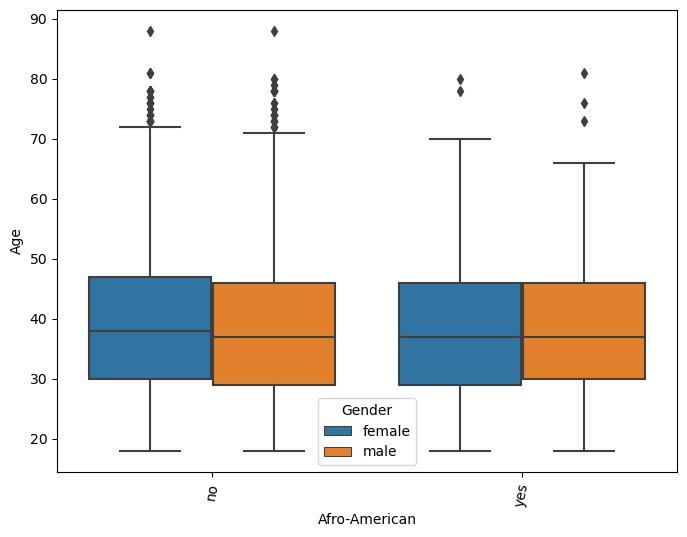

     Hispanic  Ratio
no       8866  88.66
yes      1134  11.34


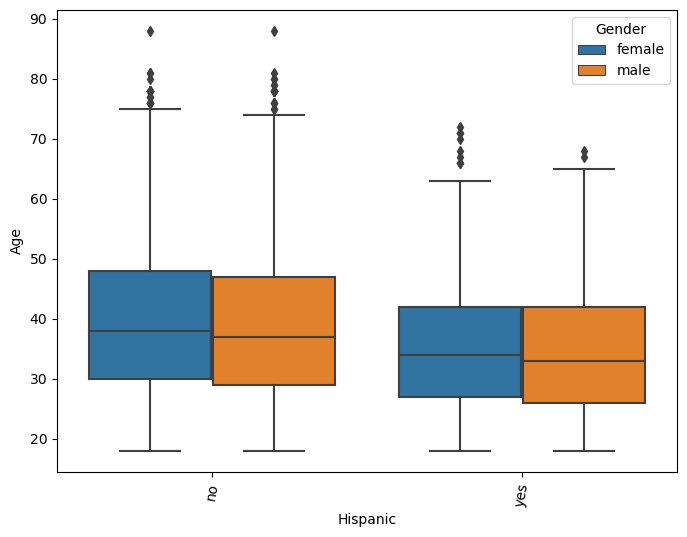

        Gender  Ratio
female    5637  56.37
male      4363  43.63


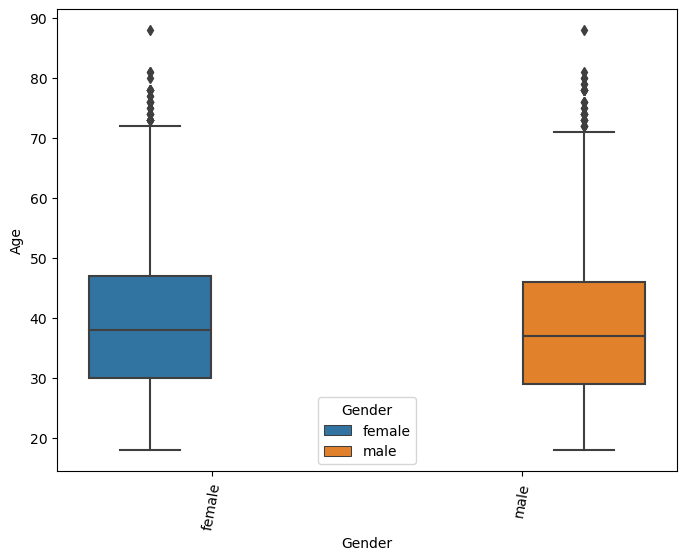

     Caucasian  Ratio
yes       8128  81.28
no        1872  18.72


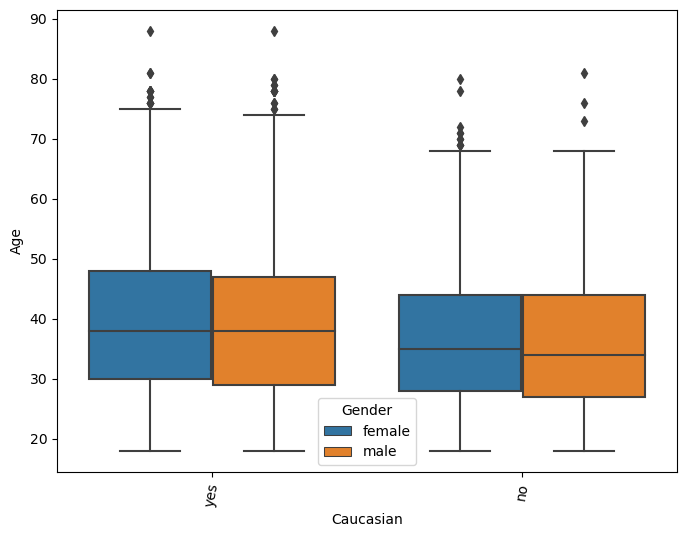

In [12]:
for col in df.columns:
    if col == "Age":
        pass
    else:
        cat_summary(df, col, True)

In [13]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))

    if plot:
        fig, axs = plt.subplots(1, 2, figsize=(8, 6))
        plt.subplot(1, 2, 1)
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.title("Frequency of " + col_name)
        plt.xticks(rotation=90)

        plt.subplot(1, 2, 2)
        values = dataframe[col_name].value_counts()
        plt.pie(x=values, labels=values.index, autopct=lambda p: '{:.2f}% ({:.0f})'.format(p, p/100 * sum(values)))
        plt.title("Frequency of " + col_name)
        plt.legend(labels=['{} - {:.2f}%'.format(index, value/sum(values)*100) for index, value in zip(values.index, values)],
                   loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=1)
        plt.show(block=True)

     Smoker  Ratio
no     7577  75.77
yes    2423  24.23


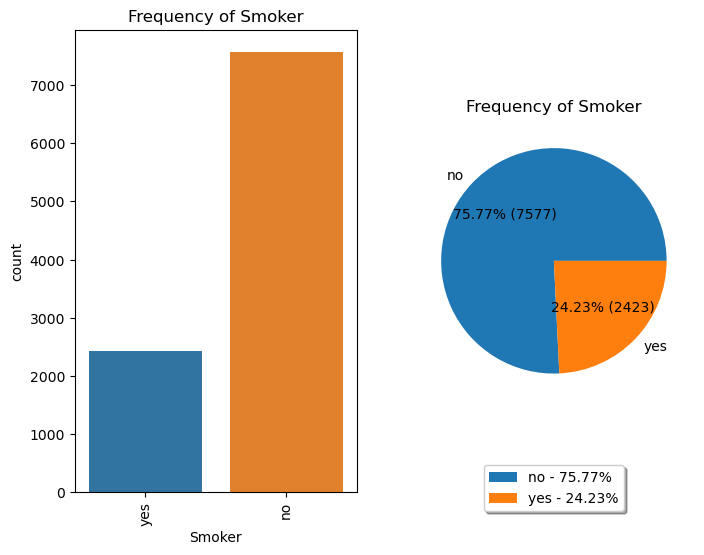

      Ban  Ratio
yes  6098  60.98
no   3902  39.02


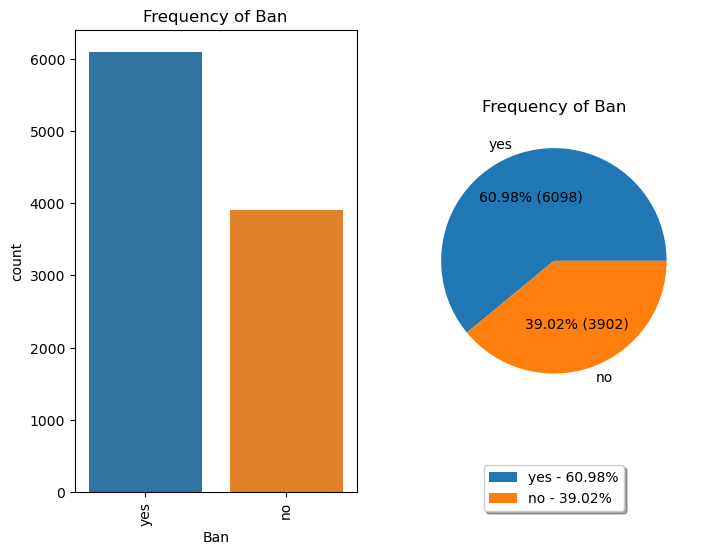

              Education  Ratio
hs                 3266  32.66
some college       2802  28.02
college            1972  19.72
master             1048  10.48
hs drop out         912   9.12


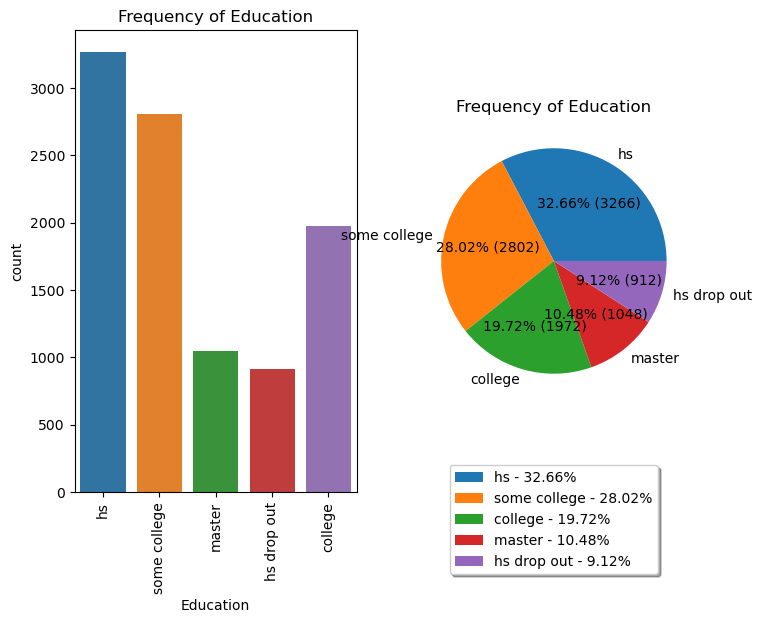

     Afro-American  Ratio
no            9231  92.31
yes            769   7.69


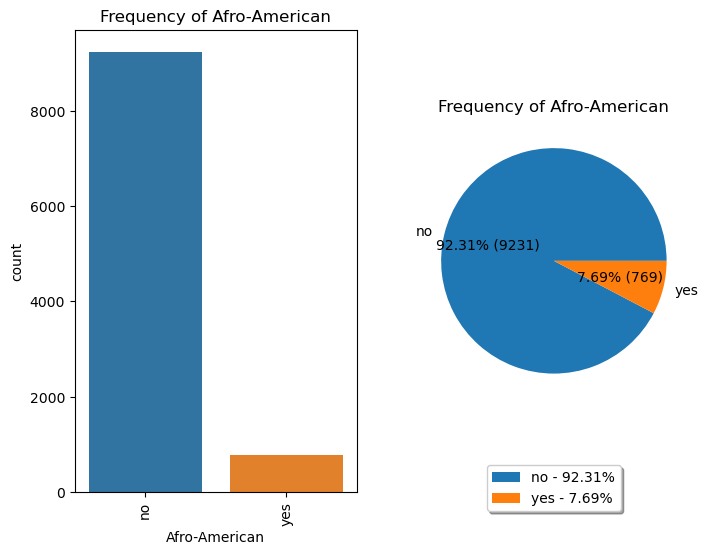

     Hispanic  Ratio
no       8866  88.66
yes      1134  11.34


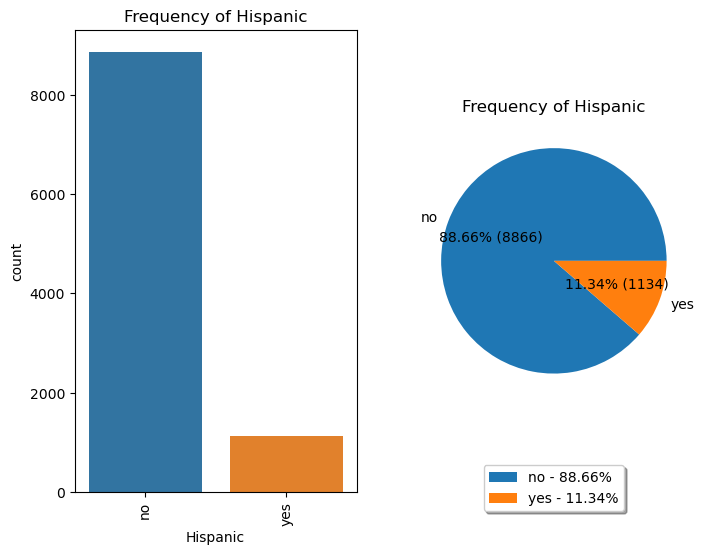

        Gender  Ratio
female    5637  56.37
male      4363  43.63


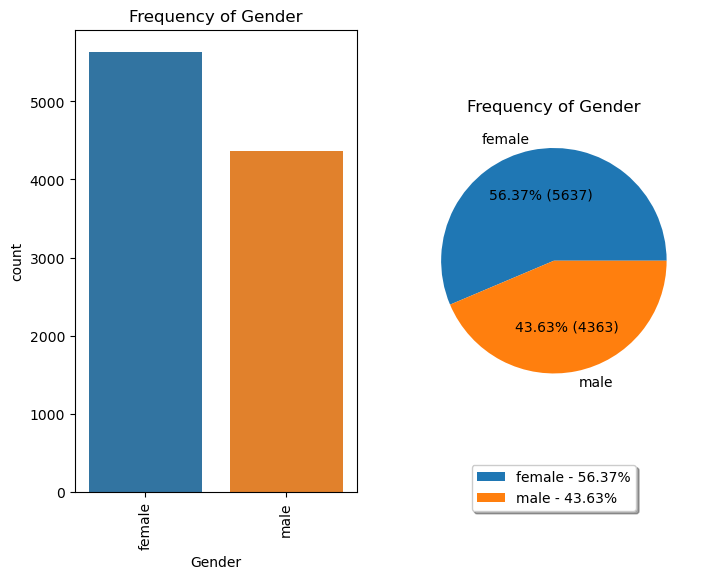

     Caucasian  Ratio
yes       8128  81.28
no        1872  18.72


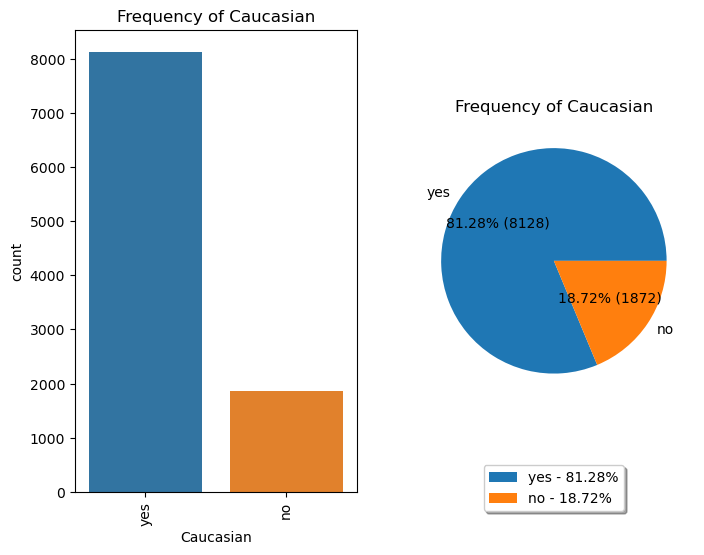

In [14]:
for col in df.columns:
    if col == "Age":
        pass
    else:
        cat_summary(df, col, True)

In [15]:
df.groupby(by=['Smoker','Gender']).mean()

Age
Smoker Gender           
no     female  39.156063
       male    38.620871
yes    female  38.432640
       male    37.416370

In [16]:
df.groupby(by=['Caucasian','Smoker','Gender']).mean()

Age
Caucasian Smoker Gender           
no        no     female  36.540636
                 male    35.949749
          yes    female  37.735294
                 male    36.540541
yes       no     female  39.792491
                 male    39.224451
          yes    female  38.562557
                 male    37.631929

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,10000.0,38.6932,12.113783,18.0,29.0,37.0,47.0,88.0


In [18]:
df['Education'].unique()

array(['hs', 'some college', 'master', 'hs drop out', 'college'],
      dtype=object)

In [19]:
df['Education'] = df['Education'].map({'hs drop out':0,'hs':1,'some college':2,'college':3,'master':4})

In [20]:
df['Education'].unique()

array([1, 2, 4, 0, 3])

In [21]:
def outlier_thresholds(dataframe, variable, low_quantile=0.10, up_quantile=0.90):
    quantile_one = dataframe[variable].quantile(low_quantile)
    quantile_three = dataframe[variable].quantile(up_quantile)
    interquantile_range = quantile_three - quantile_one
    up_limit = quantile_three + 1.5 * interquantile_range
    low_limit = quantile_one - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [22]:
check_outlier(df, df.columns)

False

In [23]:
dfd = pd.get_dummies(df,columns=['Gender','Ban','Afro-American','Hispanic','Caucasian'],drop_first=True)

In [24]:
dfd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Smoker             10000 non-null  object
 1   Age                10000 non-null  int64 
 2   Education          10000 non-null  int64 
 3   Gender_male        10000 non-null  uint8 
 4   Ban_yes            10000 non-null  uint8 
 5   Afro-American_yes  10000 non-null  uint8 
 6   Hispanic_yes       10000 non-null  uint8 
 7   Caucasian_yes      10000 non-null  uint8 
dtypes: int64(2), object(1), uint8(5)
memory usage: 283.3+ KB


In [25]:
dfd.head()

,Smoker,Age,Education,Gender_male,Ban_yes,Afro-American_yes,Hispanic_yes,Caucasian_yes
0,yes,41,1,0,1,0,0,1
1,yes,44,2,0,1,0,0,1
2,no,19,2,0,0,0,0,1
3,yes,29,1,0,0,0,0,1
4,no,28,2,0,1,0,0,1


In [26]:
!pip install catboost

In [27]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate
from sklearn.metrics import confusion_matrix,accuracy_score,mean_absolute_error,mean_squared_error,r2_score,log_loss,f1_score,jaccard_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,MinMaxScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from tabulate import tabulate

In [28]:
dfd["Smoker"]=LabelEncoder().fit_transform(dfd["Smoker"])
dfd["Smoker"]

0       1
1       1
2       0
3       1
4       0
       ..
9995    0
9996    0
9997    0
9998    1
9999    0
Name: Smoker, Length: 10000, dtype: int64

In [29]:
y = dfd['Smoker']
X = dfd.drop('Smoker',axis=1)

In [30]:
models = [('LR', LogisticRegression()),
          ('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier()),
          ('RF', RandomForestClassifier(n_estimators=200)),
          ('SVR', SVC()),
          ('GBM', GradientBoostingClassifier(n_estimators=200, learning_rate=0.08)),
          ("XGBoost", XGBClassifier()),
          ("LightGBM", LGBMClassifier()),
          ("CatBoost", CatBoostClassifier(learning_rate=0.05,verbose=False))]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [32]:
acclist=[]
for name, model in models:
    acc = np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy"))
    acclist.append([name,acc])
    print(f"RMSE: {round(acc, 4)} ({name}) ")

RMSE: 0.7574 (LR) 
RMSE: 0.7224 (KNN) 
RMSE: 0.7242 (CART) 
RMSE: 0.7211 (RF) 
RMSE: 0.7558 (SVR) 
RMSE: 0.7581 (GBM) 
RMSE: 0.745 (XGBoost) 
RMSE: 0.7531 (LightGBM) 
RMSE: 0.7485 (CatBoost) 


In [33]:
max_entry = max(acclist, key=lambda x: x[1])
max_entry_display = [max_entry[0], round(max_entry[1], 4)]
print(f"The entry with the maximum value (rounded) is: {max_entry_display}")

The entry with the maximum value (rounded) is: ['GBM', 0.7581]


In [34]:
GBM = GradientBoostingClassifier()

In [35]:
gbm_params = {
    "learning_rate": [0.01, 0.025, 0.05, 0.1, 0.15, 0.2],
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "subsample":[0.5, 0.8, 0.9, 1.0],
    "n_estimators": [50, 100, 150, 200]
    }
gbm_gs_best = GridSearchCV(GBM, gbm_params, cv=6, n_jobs=-1).fit(X_train, y_train)

In [36]:
gbm_gs_best.best_params_

{'learning_rate': 0.2,
 'max_depth': 3,
 'max_features': 'log2',
 'n_estimators': 50,
 'subsample': 0.5}

In [37]:
gbm = GradientBoostingClassifier(**gbm_gs_best.best_params_)
gbm.fit(X_train, y_train)
gbm.score(X_test, y_test)

0.763

In [38]:
gbm_pred=gbm.predict(X_test)
gbm_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

# ANN Model

In [39]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization

In [40]:
X_train.shape[1]

7

In [41]:
model = tf.keras.Sequential()
input_layer = tf.keras.layers.Dense(7, input_shape=(X_train.shape[1],), activation="relu")
model.add(input_layer)

model.add(tf.keras.layers.Dense(32, activation="relu"))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Dense(32, activation="relu"))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Dense(16, activation="relu"))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Dense(8, activation="relu"))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Dense(1, activation="sigmoid"))



model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(
    patience=10,
    restore_best_weights=True)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 56        
                                                                 
 dense_1 (Dense)             (None, 32)                256       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 128)               8320      
                                                                 
 dropout_2 (Dropout)         (None, 128)               0

In [42]:
history = model.fit(X_train, y_train,
                    callbacks=[early_stopping],
                    epochs=500, verbose=1, batch_size=500, validation_split=0.2)

Epoch 1/500
13/13 [==============================] - 8s 32ms/step - loss: 1.1875 - accuracy: 0.5066 - val_loss: 0.6816 - val_accuracy: 0.7619
Epoch 2/500
13/13 [==============================] - 0s 9ms/step - loss: 0.6953 - accuracy: 0.6136 - val_loss: 0.6717 - val_accuracy: 0.7619
Epoch 3/500
13/13 [==============================] - 0s 9ms/step - loss: 0.6715 - accuracy: 0.6570 - val_loss: 0.6578 - val_accuracy: 0.7619
Epoch 4/500
13/13 [==============================] - 0s 8ms/step - loss: 0.6501 - accuracy: 0.6897 - val_loss: 0.6568 - val_accuracy: 0.7619
Epoch 5/500
13/13 [==============================] - 0s 9ms/step - loss: 0.6386 - accuracy: 0.7047 - val_loss: 0.6528 - val_accuracy: 0.7619
Epoch 6/500
13/13 [==============================] - 0s 8ms/step - loss: 0.6363 - accuracy: 0.7147 - val_loss: 0.6496 - val_accuracy: 0.7619
Epoch 7/500
13/13 [==============================] - 0s 8ms/step - loss: 0.6240 - accuracy: 0.7277 - val_loss: 0.6444 - val_accuracy: 0.7619
Epoch 8/500


In [43]:
loss_and_metrics = model.evaluate(X_test, y_test)
print(loss_and_metrics)
print('Loss = ',loss_and_metrics[0])
print('Accuracy = ',loss_and_metrics[1])

63/63 [==============================] - 0s 2ms/step - loss: 0.5468 - accuracy: 0.7655
[0.5468148589134216, 0.765500009059906]
Loss =  0.5468148589134216
Accuracy =  0.765500009059906


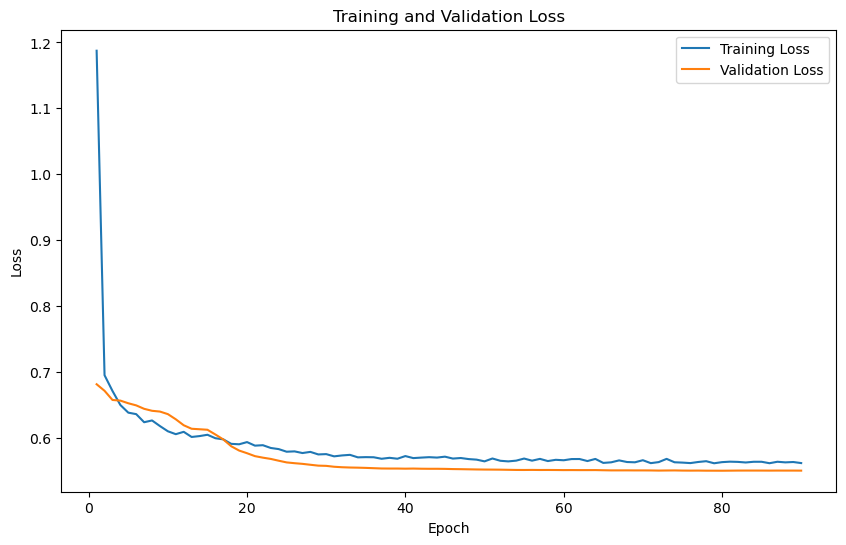

In [44]:
plt.figure(figsize=(10, 6))

train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, label="Training Loss")
plt.plot(epochs, val_loss, label="Validation Loss")

plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [45]:
predicted = model.predict(X_test)
predicted = tf.squeeze(predicted)
predicted = np.array([1 if x >= 0.5 else 0 for x in predicted])
actual = np.array(y_test)

63/63 [==============================] - 0s 2ms/step


<Axes: >

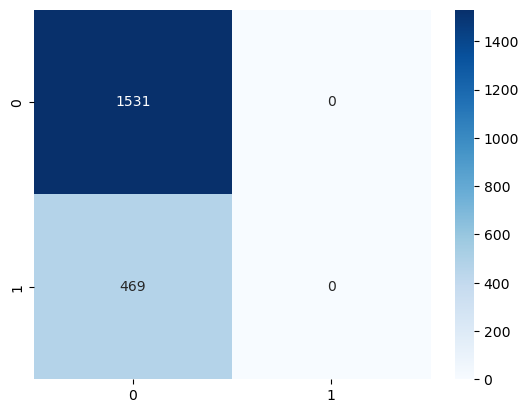

In [46]:
sns.heatmap(confusion_matrix(y_test, predicted), annot=True, fmt=".0f", cmap="Blues")

# ML Modellings Without GridSearchCV

In [47]:
rfc = RandomForestClassifier(n_estimators=350,criterion='entropy',max_depth=4)
rfcmodel = rfc.fit(X_train,y_train)
rfcmodel.score(X_test,y_test)

0.7655

In [48]:
kn = KNeighborsClassifier(n_neighbors=5)
knmodel = kn.fit(X_train,y_train)
knmodel.score(X_test,y_test)

0.723

In [49]:
log = LogisticRegression()
logmodel = log.fit(X_train,y_train)
logmodel.score(X_test,y_test)

0.7695

In [50]:
SVM = SVC(kernel='poly', random_state = 0)
svmmodel =SVM.fit(X_train, y_train)
svmmodel.score(X_test,y_test)

0.7655

In [51]:
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
treemodel =Tree.fit(X_train,y_train)
treemodel.score(X_test,y_test)

0.765

In [52]:
xgb = XGBClassifier()
xgbmodel = xgb.fit(X_train,y_train)
xgbmodel.score(X_test,y_test)

0.7515

In [53]:
gbc = GradientBoostingClassifier()
gbcmodel = gbc.fit(X_train,y_train)
xgbmodel.score(X_test,y_test)

0.7515

In [54]:
lgb = LGBMClassifier()
lgbmodel = lgb.fit(X_train,y_train)
lgbmodel.score(X_test,y_test)

0.758

In [55]:
cbc = CatBoostClassifier(verbose=0)
cbcmodel = cbc.fit(X_train,y_train)
cbcmodel.score(X_test,y_test)

0.7615

In [56]:
pipe = make_pipeline(MinMaxScaler(), DecisionTreeClassifier())
pipe.fit(X_train, y_train)
Pipeline(steps=[('MinMaxScaler', MinMaxScaler()),('DecisionTreeClassifier', DecisionTreeClassifier())])
pipe.score(X_test, y_test)

0.7275

In [57]:
pipe = make_pipeline(MinMaxScaler(), XGBClassifier())
pipe.fit(X_train, y_train)
Pipeline(steps=[('MinMaxScaler', MinMaxScaler()),('XGBClassifier', XGBClassifier())])
pipe.score(X_test, y_test)

0.7515

<Axes: >

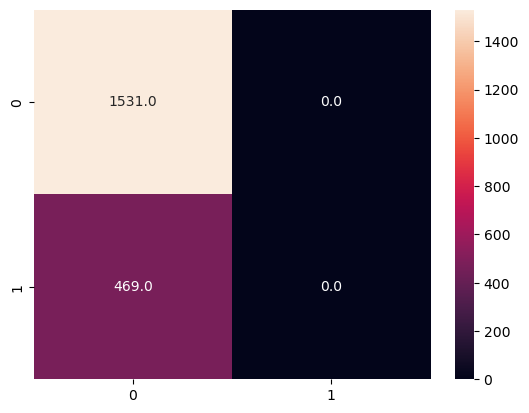

In [58]:
y_predrfc = rfcmodel.predict(X_test)
sns.heatmap(confusion_matrix(y_test,y_predrfc), annot=True, fmt=".1f")

<Axes: >

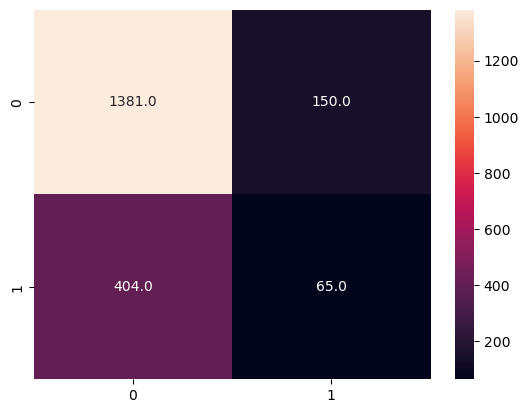

In [59]:
y_predknn = knmodel.predict(X_test)

sns.heatmap(confusion_matrix(y_test,y_predknn), annot=True, fmt=".1f")

<Axes: >

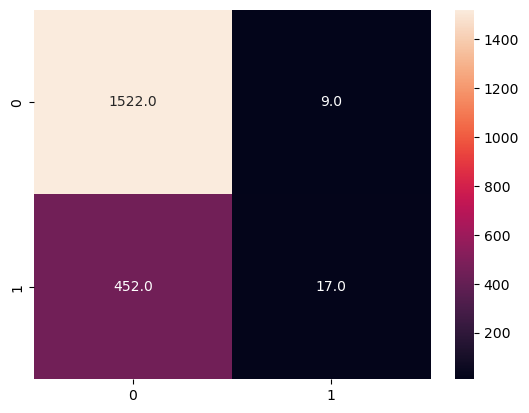

In [60]:
y_predlog = logmodel.predict(X_test)

sns.heatmap(confusion_matrix(y_test,y_predlog), annot=True, fmt=".1f")

<Axes: >

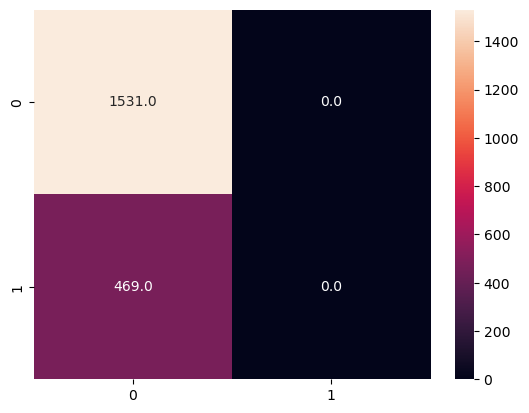

In [61]:
y_predsvm = svmmodel.predict(X_test)

sns.heatmap(confusion_matrix(y_test,y_predsvm), annot=True, fmt=".1f")

<Axes: >

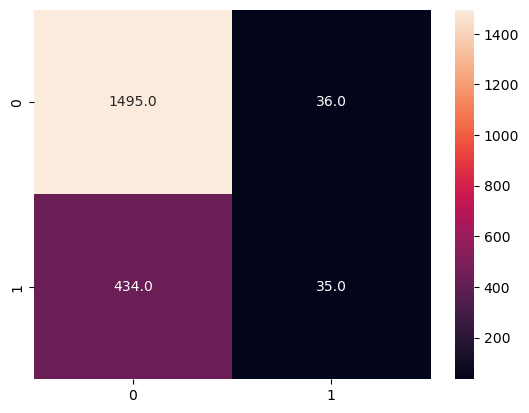

In [62]:
y_predtree = treemodel.predict(X_test)

sns.heatmap(confusion_matrix(y_test,y_predtree), annot=True, fmt=".1f")

<Axes: >

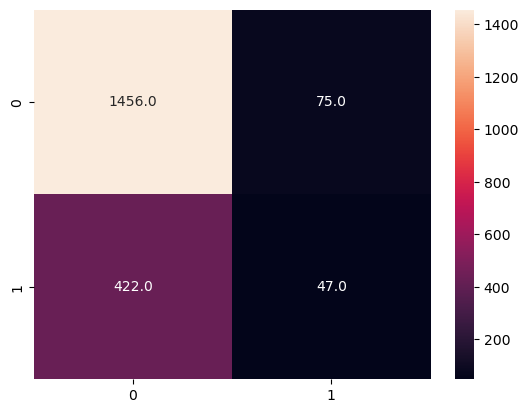

In [63]:
y_predxgb = xgbmodel.predict(X_test)

sns.heatmap(confusion_matrix(y_test,y_predxgb), annot=True, fmt=".1f")

<Axes: >

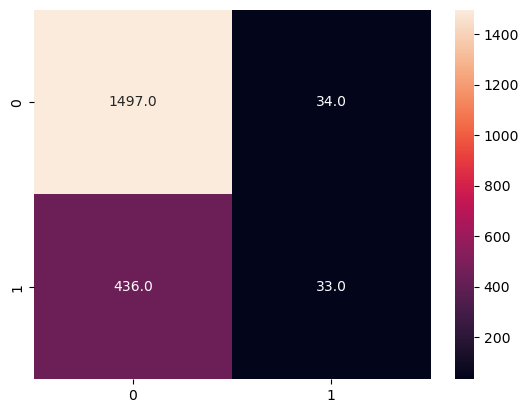

In [64]:
y_predgbc = gbcmodel.predict(X_test)

sns.heatmap(confusion_matrix(y_test,y_predgbc), annot=True, fmt=".1f")

<Axes: >

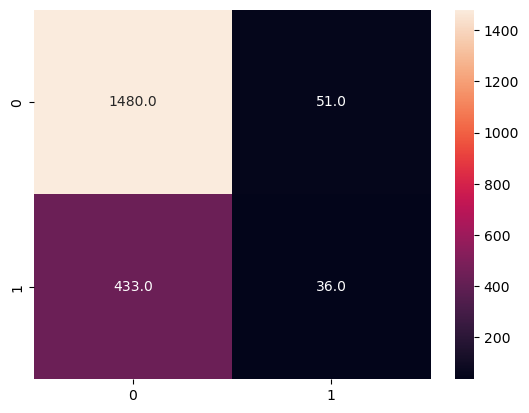

In [65]:
y_predlgb = lgbmodel.predict(X_test)

sns.heatmap(confusion_matrix(y_test,y_predlgb), annot=True, fmt=".1f")

<Axes: >

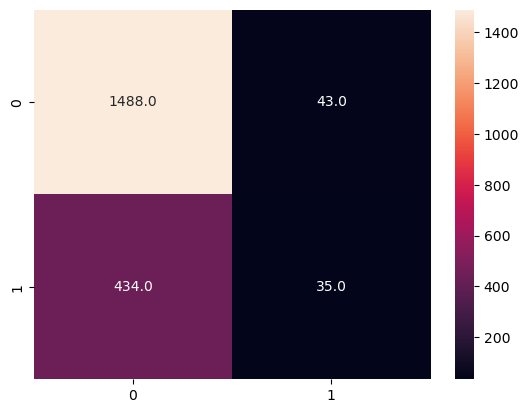

In [66]:
y_predcbc = cbcmodel.predict(X_test)

sns.heatmap(confusion_matrix(y_test,y_predcbc), annot=True, fmt=".1f")

In [67]:
LR_Accuracy_Score = accuracy_score(y_test,y_predlog)
LR_JaccardIndex = jaccard_score(y_test,y_predlog)
LR_F1_Score = f1_score(y_test,y_predlog)
LR_Log_Loss = log_loss(y_test,y_predlog)

In [68]:
print(f"LR_Accuracy_Score is :{LR_Accuracy_Score},LR_JaccardIndex is :{LR_JaccardIndex},LR_F1_Score is :{LR_F1_Score},LR_Log_Loss is :{LR_Log_Loss}")

LR_Accuracy_Score is :0.7695,LR_JaccardIndex is :0.03556485355648536,LR_F1_Score is :0.06868686868686869,LR_Log_Loss is :8.308062106191505


In [69]:
KNN_Accuracy_Score = accuracy_score(y_test,y_predknn)
KNN_JaccardIndex = jaccard_score(y_test,y_predknn)
KNN_F1_Score = f1_score(y_test,y_predknn)

In [70]:
print(f"KNN_Accuracy_Score is :{KNN_Accuracy_Score},KNN_JaccardIndex is :{KNN_JaccardIndex},KNN_F1_Score is :{KNN_F1_Score}")

KNN_Accuracy_Score is :0.723,KNN_JaccardIndex is :0.1050080775444265,KNN_F1_Score is :0.19005847953216373


In [71]:
SVM_Accuracy_Score = accuracy_score(y_test,y_predsvm)
SVM_JaccardIndex = jaccard_score(y_test,y_predsvm)
SVM_F1_Score = f1_score(y_test,y_predsvm)

In [72]:
print(f"SVM_Accuracy_Score is :{SVM_Accuracy_Score},SVM_JaccardIndex is :{SVM_JaccardIndex},SVM_F1_Score is :{SVM_F1_Score}")

SVM_Accuracy_Score is :0.7655,SVM_JaccardIndex is :0.0,SVM_F1_Score is :0.0


In [73]:
RFC_Accuracy_Score = accuracy_score(y_test,y_predrfc)
RFC_JaccardIndex = jaccard_score(y_test,y_predrfc)
RFC_F1_Score = f1_score(y_test,y_predrfc)

In [74]:
print(f"RFC_Accuracy_Score is :{RFC_Accuracy_Score},RFC_JaccardIndex is :{RFC_JaccardIndex},RFC_F1_Score is :{RFC_F1_Score}")

RFC_Accuracy_Score is :0.7655,RFC_JaccardIndex is :0.0,RFC_F1_Score is :0.0


In [75]:
Tree_Accuracy_Score = accuracy_score(y_test,y_predtree)
Tree_JaccardIndex = jaccard_score(y_test,y_predtree)
Tree_F1_Score = f1_score(y_test,y_predtree)

In [76]:
print(f"Tree_Accuracy_Score is :{Tree_Accuracy_Score},Tree_JaccardIndex is :{Tree_JaccardIndex},Tree_F1_Score is :{Tree_F1_Score}")

Tree_Accuracy_Score is :0.765,Tree_JaccardIndex is :0.06930693069306931,Tree_F1_Score is :0.12962962962962962


In [77]:
XGB_Accuracy_Score = accuracy_score(y_test,y_predxgb)
XGB_JaccardIndex = jaccard_score(y_test,y_predxgb)
XGB_F1_Score = f1_score(y_test,y_predxgb)

In [78]:
print(f"XGB_Accuracy_Score is :{XGB_Accuracy_Score},XGB_JaccardIndex is :{XGB_JaccardIndex},XGB_F1_Score is :{XGB_F1_Score}")

XGB_Accuracy_Score is :0.7515,XGB_JaccardIndex is :0.08639705882352941,XGB_F1_Score is :0.15905245346869712


In [79]:
GBC_Accuracy_Score = accuracy_score(y_test,y_predgbc)
GBC_JaccardIndex = jaccard_score(y_test,y_predgbc)
GBC_F1_Score = f1_score(y_test,y_predgbc)

In [80]:
print(f"GBC_Accuracy_Score is :{GBC_Accuracy_Score},GBC_JaccardIndex is :{GBC_JaccardIndex},GBC_F1_Score is :{GBC_F1_Score}")

GBC_Accuracy_Score is :0.765,GBC_JaccardIndex is :0.06560636182902585,GBC_F1_Score is :0.12313432835820895


In [81]:
LGB_Accuracy_Score = accuracy_score(y_test,y_predlgb)
LGB_JaccardIndex = jaccard_score(y_test,y_predlgb)
LGB_F1_Score = f1_score(y_test,y_predlgb)

In [82]:
print(f"LGB_Accuracy_Score is :{LGB_Accuracy_Score},LGB_JaccardIndex is :{LGB_JaccardIndex},LGB_F1_Score is :{LGB_F1_Score}")

LGB_Accuracy_Score is :0.758,LGB_JaccardIndex is :0.06923076923076923,LGB_F1_Score is :0.12949640287769784


In [83]:
CBC_Accuracy_Score = accuracy_score(y_test,y_predcbc)
CBC_JaccardIndex = jaccard_score(y_test,y_predcbc)
CBC_F1_Score = f1_score(y_test,y_predcbc)

In [84]:
print(f"CBC_Accuracy_Score is :{CBC_Accuracy_Score},CBC_JaccardIndex is :{CBC_JaccardIndex},CBC_F1_Score is :{CBC_F1_Score}")

CBC_Accuracy_Score is :0.7615,CBC_JaccardIndex is :0.068359375,CBC_F1_Score is :0.12797074954296161


In [85]:
d = {'KNN':[KNN_Accuracy_Score,KNN_JaccardIndex,KNN_F1_Score,'-'],
     'Tree':[Tree_Accuracy_Score, Tree_JaccardIndex, Tree_F1_Score,'-'],
     'LR':[LR_Accuracy_Score, LR_JaccardIndex, LR_F1_Score,LR_Log_Loss],
     'SVM':[SVM_Accuracy_Score, SVM_JaccardIndex, SVM_F1_Score,'-'],
     'RFC':[RFC_Accuracy_Score, RFC_JaccardIndex, RFC_F1_Score,'-'],
     'XGB':[XGB_Accuracy_Score,XGB_JaccardIndex,XGB_F1_Score,'-'],
     'GBC':[GBC_Accuracy_Score,GBC_JaccardIndex,GBC_F1_Score,'-'],
     'LGB':[LGB_Accuracy_Score,LGB_JaccardIndex,LGB_F1_Score,'-'],
     'CBC':[CBC_Accuracy_Score,CBC_JaccardIndex,CBC_F1_Score,'-']}
Regressors = pd.DataFrame(data=d, index = ['Accuracy','Jaccard Index','F1-Score','Log Loss']).T
print(tabulate(Regressors, headers = 'keys', tablefmt = 'psql'))

+------+------------+-----------------+------------+-------------------+
|      |   Accuracy |   Jaccard Index |   F1-Score | Log Loss          |
|------+------------+-----------------+------------+-------------------|
| KNN  |     0.723  |       0.105008  |  0.190058  | -                 |
| Tree |     0.765  |       0.0693069 |  0.12963   | -                 |
| LR   |     0.7695 |       0.0355649 |  0.0686869 | 8.308062106191505 |
| SVM  |     0.7655 |       0         |  0         | -                 |
| RFC  |     0.7655 |       0         |  0         | -                 |
| XGB  |     0.7515 |       0.0863971 |  0.159052  | -                 |
| GBC  |     0.765  |       0.0656064 |  0.123134  | -                 |
| LGB  |     0.758  |       0.0692308 |  0.129496  | -                 |
| CBC  |     0.7615 |       0.0683594 |  0.127971  | -                 |
+------+------------+-----------------+------------+-------------------+
